# Literature Review Figure 3

### Data from the paper

Data is taken from (Dan et. al, 2021) Figure 1. Both anti-S and anti-N IgG half-life used here are from the cross-sectional studies within the paper. The Study uses a continuous decay model for the best fit curve (plotted here). Anti-S IgG (`S-IgG`) has a half life of 140 days, 95% CI: 89-325.

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import math

In [3]:
def continuous_exp_decay(n:int, t: int, peak, a):  # Where t = day
    t-=peak
    # y = ae^-nt
    a = a  # A.U max
    n = 1/n  # Half-life days
    return a*math.exp(-n*t)

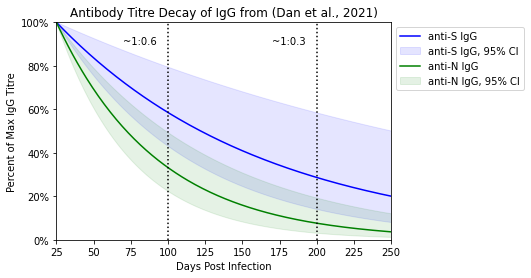

In [44]:
fig, ax = plt.subplots()

ax.set_xlim(25, 250)
ax.set_ylim(0, 100)
# ax.set_yscale('log')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


# Labels
ax.set_title('Antibody Titre Decay of IgG from (Dan et al., 2021)')
ax.set_xlabel('Days Post Infection')
ax.set_ylabel('Percent of Max IgG Titre')

# Data from paper
peak_IgG_day = 25 
peak_S_IgG = 100
peak_N_IgG = 100
S_IgG = (89, 140, 325)
N_IgG = (50, 68, 106)

# Plotting lines
x = np.linspace(0, 350, 350)
S_lower_data = [continuous_exp_decay(S_IgG[0], t, peak_IgG_day, peak_S_IgG) for t in x]
S_mean_data = [continuous_exp_decay(S_IgG[1], t, peak_IgG_day, peak_S_IgG) for t in x]
S_mean, = ax.plot(x, S_mean_data,c='b', ls='-')
S_upper_data = [continuous_exp_decay(S_IgG[2], t, peak_IgG_day, peak_S_IgG) for t in x]
N_lower_data = [continuous_exp_decay(N_IgG[0], t, peak_IgG_day, peak_N_IgG) for t in x]
N_mean_data = [continuous_exp_decay(N_IgG[1], t, peak_IgG_day, peak_N_IgG) for t in x]
N_mean, = ax.plot(x, N_mean_data,c='g', ls='-')
N_upper_data = [continuous_exp_decay(N_IgG[2], t, peak_IgG_day, peak_N_IgG) for t in x]
S_fill = ax.fill_between(x, S_lower_data, S_upper_data, color='b', alpha=0.1)
N_fill = ax.fill_between(x, N_lower_data, N_upper_data, color='g', alpha=0.1)


# Legend and annotations
ax.legend([S_mean, S_fill, N_mean, N_fill],
          ['anti-S IgG', 'anti-S IgG, 95% CI', 'anti-N IgG', 'anti-N IgG, 95% CI'],
          bbox_to_anchor=(1, 1))
ax.axvline(x=100, color='black', linestyle=':')
ax.axvline(x=200, color='black', linestyle=':')
arrow_props=dict(
        facecolor='black',
        shrink=0.01,
        width=1,
        headwidth=5,
        headlength=5
    )
ax.annotate(f'~1:{round(N_mean_data[100]/S_mean_data[100], 1)}', xy = (100, 30), xytext=(70, 90))
ax.annotate(f'~1:{round(N_mean_data[200]/S_mean_data[200], 1)}', xy = (200, 60), xytext=(170, 90))
fig.savefig('AntibodyTitreDecay.png')

## References

DAN, J. M., MATEUS, J., KATO, Y., HASTIE, K. M., YU, E. D., FALITI, C. E., GRIFONI, A., RAMIREZ, S. I., HAUPT, S., FRAZIER, A., NAKAO, C., RAYAPROLU, V., RAWLINGS, S. A., PETERS, B., KRAMMER, F., SIMON, V., SAPHIRE, E. O., SMITH, D. M., WEISKOPF, D., SETTE, A. & CROTTY, S. 2021. Immunological memory to SARS-CoV-2 assessed for up to 8 months after infection. Science, 371.
